# Análisis de Precio de Bolsa vs Restricciones

Autor: Juan Camilo Jaramillo Tascón: https://www.linkedin.com/in/juancjaramillot/

In [1]:
#pip install pydataxm

In [2]:
from pydataxm import *
import datetime as dt     
import pandas as pd                       

In [3]:
objetoAPI = pydataxm.ReadDB()

## Precio de Bolsa Nacional - Sistema

In [4]:
df_pb = objetoAPI.request_data(
                        "PrecBolsNaci",           
                        "Sistema",                
                        dt.date(2021, 12, 12),    
                        dt.date(2022, 12, 8))

df_pb.index = df_pb['Date']
df_pb = df_pb.drop(columns=['Id', 'Values_code', 'Date'])
df_pb['$/kWh_prom_día'] = df_pb.mean(axis=1)

## Restricciones Aliviadas - Sistema

In [5]:
df_r = objetoAPI.request_data(
                        "RestAliv",           
                        "Sistema",                
                        dt.date(2021, 12, 12),    
                        dt.date(2022, 12, 8))

df_r.index = df_r['Date']
df_r = df_r.drop(columns=['Id', 'Values_code', 'Date'])
df_r['$_sum_día'] = df_r.sum(axis=1)

## Demanda Comercial - Sistema

In [6]:
df_d = objetoAPI.request_data(
                        "DemaCome",           
                        "Sistema",                
                        dt.date(2021, 12, 12),    
                        dt.date(2022, 12, 8))

df_d.index = df_d['Date']
df_d = df_d.drop(columns=['Id', 'Values_code', 'Date'])
df_d['kWh_sum_día'] = df_d.sum(axis=1)

## Procesamiento de información

In [7]:
df_t = pd.DataFrame()
df_t['RestAliv_$/kWh'] = df_r.loc[:, '$_sum_día']/df_d.loc[:, 'kWh_sum_día']
df_t['PrecioBolsa_$/kWh'] = df_pb.loc[:, '$/kWh_prom_día']
df_t

,RestAliv_$/kWh,PrecioBolsa_$/kWh
Date,,
2021-12-12,24.536385,245.800083
2021-12-13,21.548910,301.525793
2021-12-14,14.977041,364.594810
2021-12-15,11.779841,406.615585
2021-12-16,9.650646,479.440777
...,...,...
2022-12-04,17.772892,250.631250
2022-12-05,16.889014,292.813588
2022-12-06,16.730284,242.382067


In [8]:
df_t.describe()

,RestAliv_$/kWh,PrecioBolsa_$/kWh
count,362.000000,362.000000
mean,31.646560,219.393380
std,14.574814,125.868537
min,-0.183725,94.777213
25%,22.460461,109.591520
50%,29.478363,194.868377
75%,42.055641,276.969541
max,97.324687,679.975688


## Visualización de información y conclusiones - Precio de Bolsa vs Restricciones

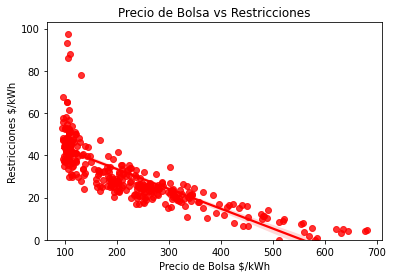

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(data=df_t,x='PrecioBolsa_$/kWh', y='RestAliv_$/kWh', color='r')
plt.title('Precio de Bolsa vs Restricciones')
plt.xlabel('Precio de Bolsa $/kWh')
plt.ylabel('Restricciones $/kWh')
plt.ylim(0,)
plt.show()

In [10]:
df_t.corr()

,RestAliv_$/kWh,PrecioBolsa_$/kWh
RestAliv_$/kWh,1.000000,-0.811135
PrecioBolsa_$/kWh,-0.811135,1.000000


In [11]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df_t['PrecioBolsa_$/kWh'], df_t['RestAliv_$/kWh'])
print("El coeficiente de correlación de Pearson", pearson_coef, " con un P-value de P =", p_value)  

El coeficiente de correlación de Pearson -0.8111349374673561  con un P-value de P = 7.115590076767871e-86


In [12]:
p_value < 0.001

True

Conclusión:

Dado que el p-value es < 0.001, la correlación entre el Precio de Bolsa y las Restricciones es estadísticamente significativa, y la relación lineal negativa es muy fuerte (~ -0.811, cercana a -1).

Autor: Juan Camilo Jaramillo Tascón: https://www.linkedin.com/in/juancjaramillot/